In [1]:
import yfinance as yf

import pandas as pd
import numpy as np

from ipywidgets import interact, interact_manual
import ipywidgets as widgets

from datetime import date, timedelta, datetime
import os
import os.path
import time

import history

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

%matplotlib inline

# Analysis

In [3]:
%%time

ticker = "0002.HK"
prices = history.get_prices(ticker)
prices.index

CPU times: user 20.9 ms, sys: 210 µs, total: 21.1 ms
Wall time: 19.4 ms


DatetimeIndex(['2000-01-04', '2000-01-05', '2000-01-06', '2000-01-07',
               '2000-01-10', '2000-01-11', '2000-01-12', '2000-01-13',
               '2000-01-14', '2000-01-17',
               ...
               '2020-05-25', '2020-05-26', '2020-05-27', '2020-05-28',
               '2020-05-29', '2020-06-01', '2020-06-02', '2020-06-03',
               '2020-06-04', '2020-06-05'],
              dtype='datetime64[ns]', name='Date', length=5099, freq=None)

In [4]:
prices[prices.Dividends > 0].sort_index(ascending=False).head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-06-02,77.400,78.150,77.250,78.100,2941082,0.63,0
2020-03-06,82.034,82.183,81.141,81.935,5620440,1.19,0
2020-03-05,79.799,82.342,79.799,82.342,10261048,1.19,0
2019-12-02,77.772,77.869,76.953,76.953,2207530,0.63,0
2019-09-02,75.540,76.448,74.775,74.966,3032723,0.63,0
2019-05-31,85.054,85.197,83.821,84.106,4174511,0.63,0
2019-03-08,86.532,86.673,85.684,85.684,2803054,1.19,0
2018-12-03,80.681,81.193,79.984,79.984,8074178,0.61,0
2018-09-03,84.174,85.882,84.081,85.605,2648564,0.61,0


In [5]:
datetime.strptime("20200102", "%Y%m%d")

datetime.datetime(2020, 1, 2, 0, 0)

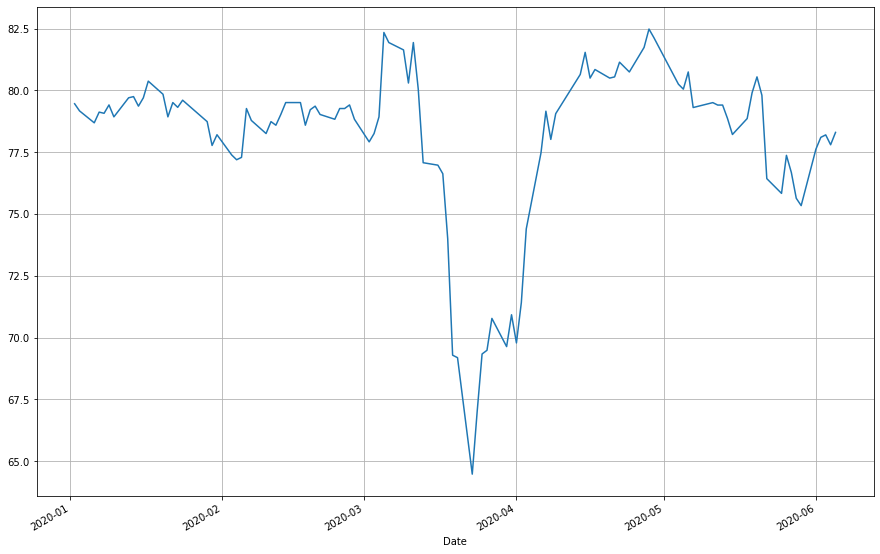

In [7]:
start_date = "20200101"
start_date = datetime.strptime("20200102", "%Y%m%d")

close = prices["Close"]
close = close[close.index >= np.datetime64(start_date)]

plt.figure(figsize=(15, 10))
close.plot(legend=False, grid=True)